In [1]:
%%time

from playLib.geo_median import clipped_np3d_from_list

root = '/vsis3/dev-et-data/NDVI_filled/'
file_pattern = '.250_m_NDVI.tif'
geojson_file = 'great_lakes_half.geojson'

file_list=[]
time_list=[]
for year in range(2003,2017+1):
    day=1
    file = str(year) +'{0:03g}'.format(day)
    file = file+file_pattern
    file = root + str(year) + '/' +file
    print (year,file)
    file_list.append(file)
    
    time_name = str(year) + '_day_{0:03g}'.format(day)
    print(time_name)
    time_list.append(time_name)
    
NPA = clipped_np3d_from_list(file_list, geojson_file, nan='nan')

#DS = xarray_from_list(file_list,time_list,'ndvi')
    
    



2003 /vsis3/dev-et-data/NDVI_filled/2003/2003001.250_m_NDVI.tif
2003_day_001
2004 /vsis3/dev-et-data/NDVI_filled/2004/2004001.250_m_NDVI.tif
2004_day_001
2005 /vsis3/dev-et-data/NDVI_filled/2005/2005001.250_m_NDVI.tif
2005_day_001
2006 /vsis3/dev-et-data/NDVI_filled/2006/2006001.250_m_NDVI.tif
2006_day_001
2007 /vsis3/dev-et-data/NDVI_filled/2007/2007001.250_m_NDVI.tif
2007_day_001
2008 /vsis3/dev-et-data/NDVI_filled/2008/2008001.250_m_NDVI.tif
2008_day_001
2009 /vsis3/dev-et-data/NDVI_filled/2009/2009001.250_m_NDVI.tif
2009_day_001
2010 /vsis3/dev-et-data/NDVI_filled/2010/2010001.250_m_NDVI.tif
2010_day_001
2011 /vsis3/dev-et-data/NDVI_filled/2011/2011001.250_m_NDVI.tif
2011_day_001
2012 /vsis3/dev-et-data/NDVI_filled/2012/2012001.250_m_NDVI.tif
2012_day_001
2013 /vsis3/dev-et-data/NDVI_filled/2013/2013001.250_m_NDVI.tif
2013_day_001
2014 /vsis3/dev-et-data/NDVI_filled/2014/2014001.250_m_NDVI.tif
2014_day_001
2015 /vsis3/dev-et-data/NDVI_filled/2015/2015001.250_m_NDVI.tif
2015_day_001

In [2]:
NPA

array([[[0.1865493 , 0.10467361, 0.11167014, ..., 0.2056493 ,
         0.07020903, 0.14950208],
        [0.16950764, 0.0978375 , 0.10465   , ..., 0.19521876,
         0.06954513, 0.14318334],
        [0.1565611 , 0.09268958, 0.10033333, ..., 0.18394306,
         0.06897569, 0.1378743 ],
        ...,
        [0.1506243 , 0.11600417, 0.13076042, ..., 0.19772847,
         0.2774632 , 0.25398126],
        [0.15883611, 0.12124236, 0.14033194, ..., 0.20097014,
         0.27543402, 0.26208404],
        [0.16664584, 0.12540069, 0.15096389, ..., 0.20292431,
         0.27135417, 0.2664875 ]],

       [[0.18963888, 0.10410764, 0.11514792, ..., 0.20904861,
         0.0748375 , 0.15311041],
        [0.1710618 , 0.09659652, 0.1071493 , ..., 0.19743264,
         0.07303958, 0.1468125 ],
        [0.15651388, 0.09079028, 0.10174306, ..., 0.18483542,
         0.07123403, 0.14065833],
        ...,
        [0.13928542, 0.11801389, 0.12449583, ..., 0.19861667,
         0.2808257 , 0.25054443],
        [0.1

In [3]:
NPA.shape

(4757, 2402, 15)

In [4]:
import numpy
median_ary = numpy.median(NPA,axis=2)

In [5]:
median_ary.shape

(4757, 2402)

In [6]:
from playLib.geo_median import my_plot

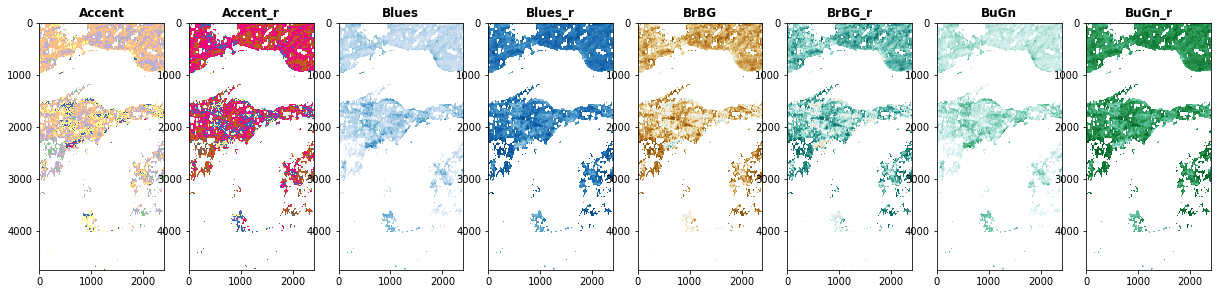

In [7]:
my_plot(median_ary)

In [8]:
median_ary

array([[0.10781667, 0.10309028, 0.10033333, ..., 0.18192917, 0.19337083,
        0.20292431],
       [0.10906459, 0.10255903, 0.10017291, ..., 0.17708056, 0.18905278,
        0.19845833],
       [0.11390486, 0.10690972, 0.10374653, ..., 0.17823333, 0.18990625,
        0.19858125],
       ...,
       [       nan,        nan,        nan, ..., 0.26386943, 0.26582432,
        0.2690618 ],
       [       nan,        nan,        nan, ..., 0.27250904, 0.27410904,
        0.27699307],
       [       nan,        nan,        nan, ..., 0.28044027, 0.28168124,
        0.28429723]], dtype=float32)

In [9]:
! aws s3 ls dev-et-data/NDVI_filled/med2003_2017/med001.250_m_NDVI.tif

2020-04-26 14:28:55 2882174998 med001.250_m_NDVI.tif
2020-04-26 14:28:55       2160 med001.250_m_NDVI.tif.aux.xml


In [15]:
from playLib.geo_median import clip_by_geojson

infile = '/vsis3/dev-et-data/NDVI_filled/med2003_2017/med001.250_m_NDVI.tif'

olena_ary = clip_by_geojson(infile,geojson_file, nan='nan')

                                            geometry
0  POLYGON ((-90.00000 49.90000, -85.00000 49.900...
-90.0 -85.0 49.9 40.0
Window(col_off=31509.966447934145, row_off=48.054820359615405, width=2402.6858183151417, height=4757.317920263988)


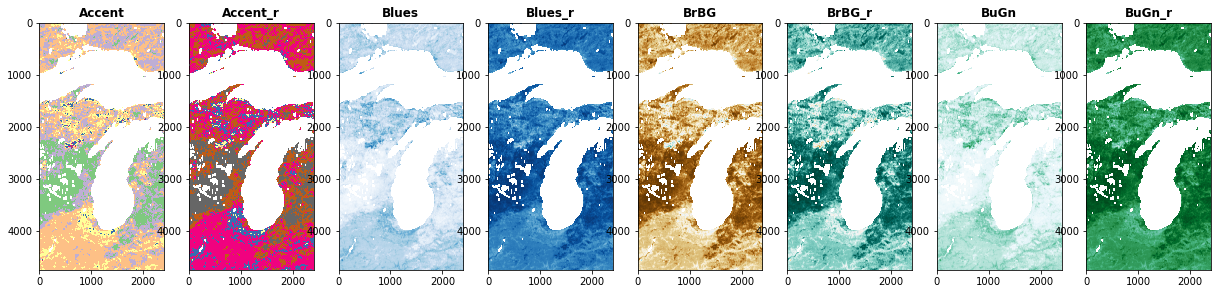

In [16]:
my_plot(olena_ary)

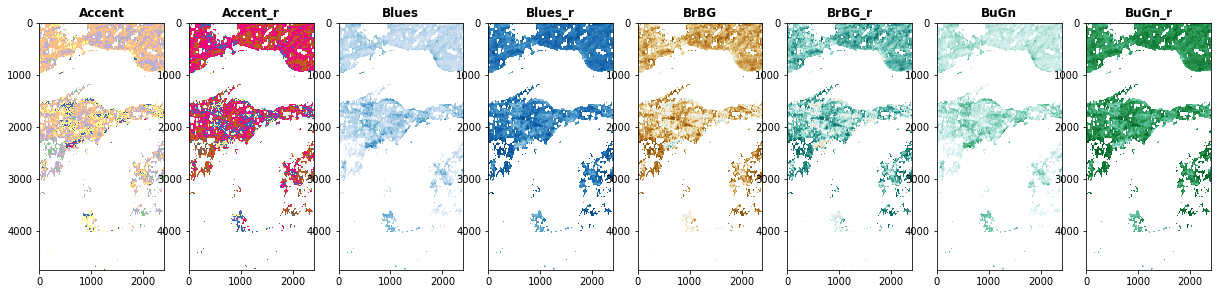

In [12]:
my_plot(median_ary)

In [13]:
diff_ary = olena_ary - median_ary

In [14]:
diff_ary.max()

nan